<a href="https://colab.research.google.com/github/juhi2021/juhi2021.github.io/blob/main/docs/Loan_Pred_with_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas for loading the CSV file
import pandas as pd

#import numpy for maths
import numpy as np

# import seaborn for visualization
import seaborn as sns

from scipy import stats 
from sklearn import preprocessing
from collections import Counter

#import matplotlib for graphs
import matplotlib.pyplot as plt

#To visualise in the notebook
%matplotlib inline

sns.set_style('darkgrid')

# Mount google drive in google colab
#from google.colab import drive
#drive.mount('/content/drive')

#to import the custom module after mounting the drive
import sys
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks')

#custom library for data exploration
from lib import explore_data as ed
from lib.Model import Model

In [ ]:
train_path = '/content/drive/MyDrive/Data/Loan Pred/train.csv'
test_path = r'/content/drive/MyDrive/Data/Loan Pred/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.shape, test_df.shape

((614, 13), (367, 12))

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#select the target
target_var = 'Loan_Status'
y = pd.DataFrame(train_df[target_var])

#set the index for the concatenated dataset
train_df = train_df.set_index("Loan_ID")
test_df = test_df.set_index("Loan_ID")

train_df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [ ]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_df.describe(include=['O'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [ ]:
# list of numerical variables
num_feat = list(train_df.select_dtypes(exclude='object').columns)
print('numerical variables: ', num_feat)

dis_feat_threshold = 25
dis_feat = [features for features in num_feat if len(train_df[features].unique())<dis_feat_threshold]
print('discrete variables:', dis_feat)

cont_feat = [feature for feature in num_feat if feature not in dis_feat]
print('continuous variables:', cont_feat)

# list of categorical variables
cat_feat = list(train_df.select_dtypes(include='object').columns)
print('categorical variables: ', cat_feat)

numerical variables:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
discrete variables: ['Loan_Amount_Term', 'Credit_History']
continuous variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical variables:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
# import module
from tabulate import tabulate

#missing data
null_total = train_df.isnull().sum().sort_values(ascending=False)
null_percent = train_df.isnull().sum()/train_df.shape[0]*100
null_percent = pd.concat([null_total, null_percent], axis=1, keys=['Total', 'Percent'])
null_percent.head(20)
print(tabulate(null_percent, headers=('Feature', 'Null Total', 'Null Percent')))

NameError: ignored

In [ ]:
null_threshold = 15
col_for_drop = null_percent[null_percent>null_threshold].keys().tolist()
print("Features with more than {}% of null values {}".format(null_threshold, col_for_drop))

Features with more than 15% of null values ['Total', 'Percent']


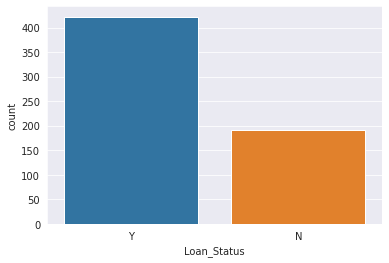

In [ ]:
sns.countplot(x=target_var, data=train_df)

## Uni-variate Analysis

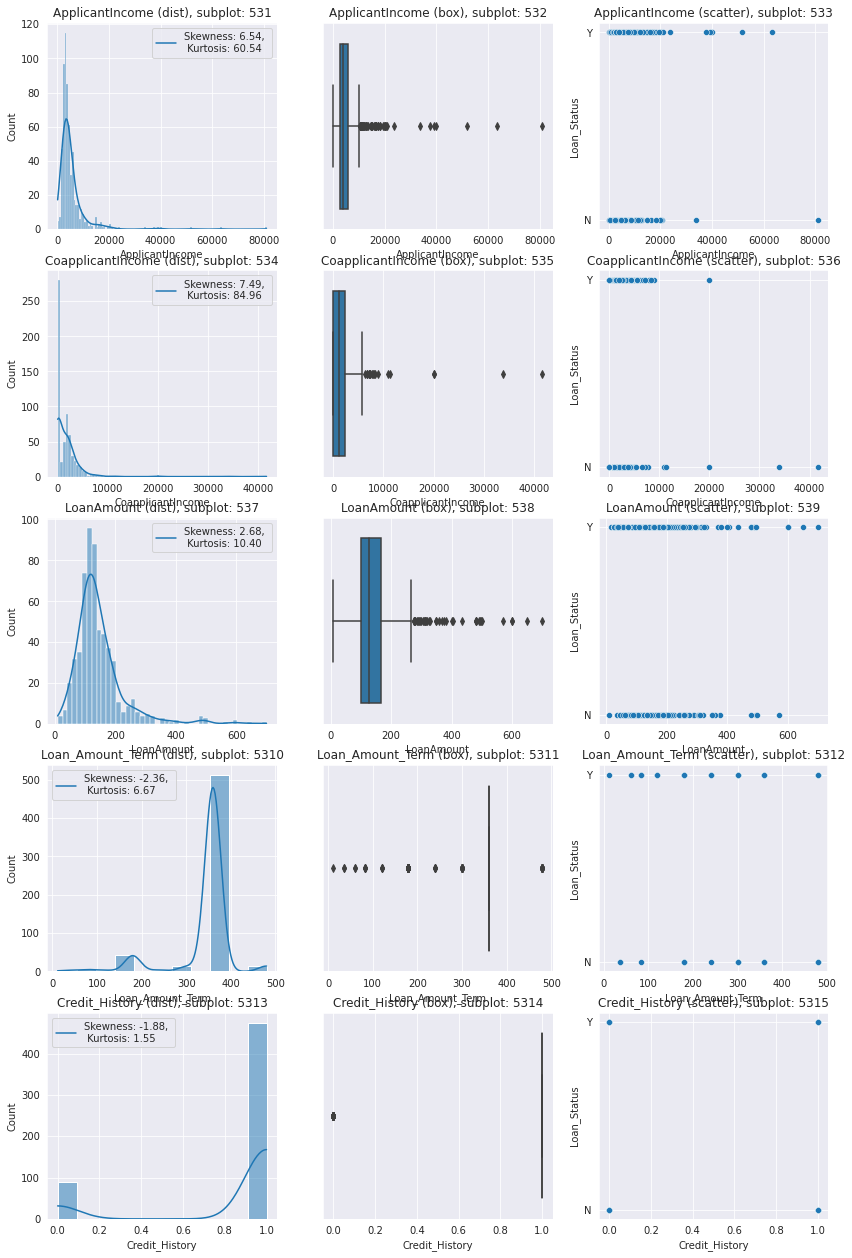

In [ ]:
plt = ed.plot_uni_num_data_analysis(train_df, target_var, num_feat, plt)
plt.show()

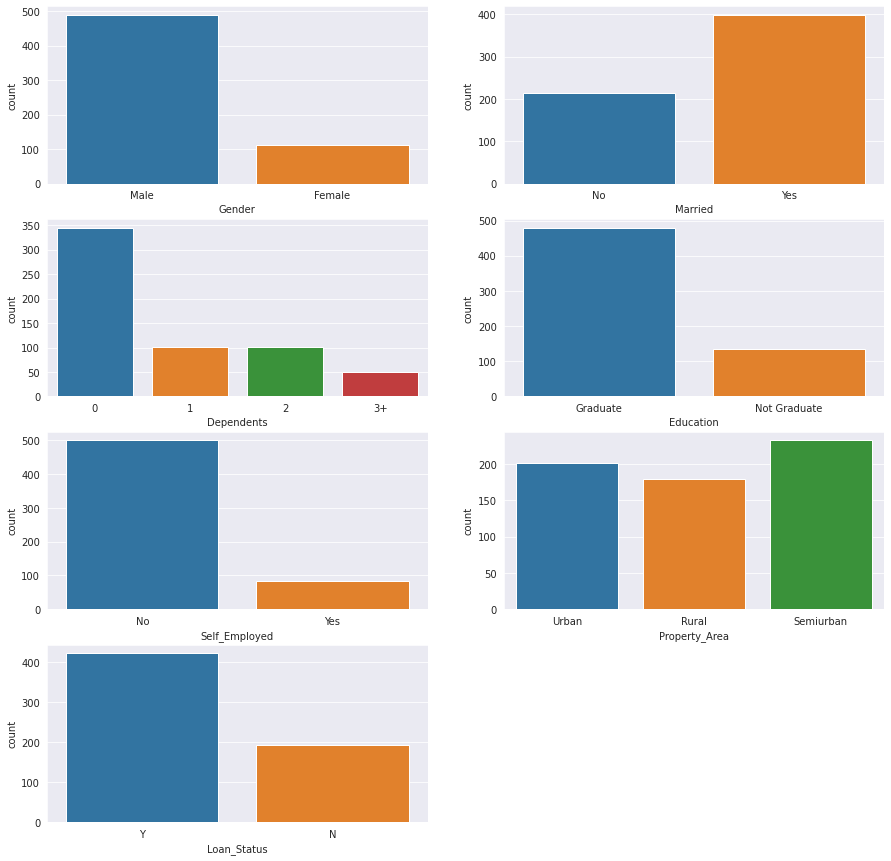

In [ ]:
#Visualising categorical Data 
fig = plt.figure(figsize=(15, 15))

fig_counter = 1
no_of_cols = 2

for feature in cat_feat:
  ax = fig.add_subplot(np.ceil(len(cat_feat)/no_of_cols), no_of_cols, fig_counter)
  sns.countplot(data=train_df, x=feature)
  fig_counter =  fig_counter + 1
  

## Bivariate Analysis

In [ ]:
g = sns.PairGrid(train_df, corner=True, hue=target_var)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

NameError: ignored

In [ ]:
#Visualising numeric feature against target variable
fig = plt.figure(figsize=(15, 15))

fig_counter = 1
no_of_cols = 2

for feature in num_feat:
  ax = fig.add_subplot(np.ceil(len(num_feat)/no_of_cols), no_of_cols, fig_counter)
  sns.boxplot(data=train_df, x=feature, y=target_var)
  fig_counter =  fig_counter + 1

NameError: ignored

In [ ]:
## Lets Find the realtionship between categorical and target variables
fig = plt.figure(figsize=(15, 15))

fig_counter = 1
no_of_cols = 2

for feature in cat_feat:
  ax = fig.add_subplot(np.ceil(len(cat_feat)/no_of_cols), no_of_cols, fig_counter)
  #sns.boxplot(data=train_df, x=feature, y=target_var)
  sns.countplot(x=feature, hue=target_var, data=train_df)
  fig_counter =  fig_counter + 1

In [ ]:
#Mapp the Y/N to 1/0 in the target variable column so that target becomes numeric and 
#we can find the correlation of the numeric variable to the converted numeric target variable
target_map = {'Y':1,'N':0}
train_df[target_var] = train_df[target_var].map(target_map).astype(int)
y[target_var] = y[target_var].map(target_map).astype(int)

In [ ]:
## The relationship between features and target
corr = train_df.corr()

# Getting the Upper Triangle of the corelation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, cmap ='coolwarm', linewidths=2, mask=matrix)

In [ ]:
#Correlation of numeric variables with the target variable
corr['Loan_Status']

In [ ]:
#Discrete variables and target
sns.countplot(x='Loan_Status', data=train_df, hue='Credit_History')

In [ ]:
sns.barplot(data=train_df, x='ApplicantIncome', y='Self_Employed', hue='Loan_Status')

In [ ]:
# Credit History and Loan Status has mean ApplicantIncome
pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'], margins=True, aggfunc='mean', values=train_df.ApplicantIncome)

In [ ]:
pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'], normalize='columns')
#The Loan_Status column with value '0' has 45% of them have credit history 0 
#and 55% have 1. Similarly, Loan_Status='1' has 98% with credit history='1' and rest with '0'

In [ ]:
pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'], normalize='index')
#The Credit_History row with value '0' has 92% of them have Loan_Status='0' 
#and 8% have 1. Similarly, Credit_History='1' has 80% with Loan_Status='1' and rest with '0'

In [ ]:
#plt.figure(figsize=(10,10))
cross_tab = pd.crosstab(train_df['Loan_Status'], [train_df.Gender, train_df.Married])
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, cbar=False, fmt='.3g')

## Data Processing

In [ ]:
#Handle missing data
train_df['Gender'].fillna(value=train_df['Gender'].dropna().mode()[0], inplace=True)
train_df['Married'].fillna(value=train_df['Married'].dropna().mode()[0], inplace=True)
train_df['Dependents'].fillna(value='1', inplace=True) #since dtype is object
train_df['Credit_History'].fillna(value=train_df['Credit_History'].dropna().mode()[0], inplace=True)
train_df['Self_Employed'].fillna(value=train_df['Self_Employed'].dropna().mode()[0], inplace=True)
train_df['LoanAmount'].fillna(value=train_df['LoanAmount'].dropna().mean(), inplace=True)
train_df['Loan_Amount_Term'].fillna(value=0, inplace=True)

In [ ]:
#Handle missing data in test_df
test_df['Gender'].fillna(value=test_df['Gender'].dropna().mode()[0], inplace=True)
test_df['Married'].fillna(value=test_df['Married'].dropna().mode()[0], inplace=True)
test_df['Dependents'].fillna(value='1', inplace=True) #since dtype is object
test_df['Credit_History'].fillna(value=test_df['Credit_History'].dropna().mode()[0], inplace=True)
test_df['Self_Employed'].fillna(value=test_df['Self_Employed'].dropna().mode()[0], inplace=True)
test_df['LoanAmount'].fillna(value=test_df['LoanAmount'].dropna().mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(value=0, inplace=True)

In [ ]:
#missing data
null_total = train_df.isnull().sum().sort_values(ascending=False)
null_percent = train_df.isnull().sum()/test_df.shape[0]*100
null_percent = pd.concat([null_total, null_percent], axis=1, keys=['Total', 'Percent'])
null_percent.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [ ]:
cat_feat_le = cat_feat.copy()
cat_feat_le.remove('Dependents')

#Applying label encoding
def label_encoding(dataset, columns):
    label_encoder = preprocessing.LabelEncoder()
    for col in columns:
        dataset[col] = label_encoder.fit_transform(dataset[col]).astype(int)
    return dataset

#Convert all categorical variables to number
train_df = label_encoding(train_df, cat_feat_le)

cat_feat_le.remove('Loan_Status')
#Convert all categorical variables to number for test df
test_df = label_encoding(test_df, cat_feat_le)

In [ ]:
train_df.isna().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

In [ ]:
train_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
train_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,   0., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
train_df['Dependents'] = train_df['Dependents'].map( {'0': 0, '1': 1, '2':1, '3+':1}).astype(int)
test_df['Dependents'] = test_df['Dependents'].map( {'0': 0, '1': 1, '2':1, '3+':1}).astype(int)

In [ ]:
train_df['Loan_Amount_Term'] = [1 if (train_df['Loan_Amount_Term'][index]==360) else 0 for index, value in train_df['Loan_Amount_Term'].items() ]
train_df['Loan_Amount_Term'].astype(int)
train_df['Credit_History'] = train_df['Credit_History'].astype(int)
train_df['CoapplicantIncome'] = [0 if (train_df['CoapplicantIncome'][index]==0) else 1 for index, value in train_df['CoapplicantIncome'].items() ]
train_df['CoapplicantIncome'].astype(int)

test_df['Loan_Amount_Term'] = [1 if (test_df['Loan_Amount_Term'][index]==360) else 0 for index, value in test_df['Loan_Amount_Term'].items() ]
test_df['Loan_Amount_Term'].astype(int)
test_df['Credit_History'] = test_df['Credit_History'].astype(int)
test_df['CoapplicantIncome'] = [0 if (test_df['CoapplicantIncome'][index]==0) else 1 for index, value in test_df['CoapplicantIncome'].items() ]
test_df['CoapplicantIncome'].astype(int)

train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0,146.412162,1,1,2,1
LP001003,1,1,1,0,0,4583,1,128.000000,1,1,0,0
LP001005,1,1,0,0,1,3000,0,66.000000,1,1,2,1
LP001006,1,1,0,1,0,2583,1,120.000000,1,1,2,1
LP001008,1,0,0,0,0,6000,0,141.000000,1,1,2,1


In [ ]:
#categorical features not ordinal for one hot encoding
cat_feat_ohe = ['Property_Area']
df_ohe = pd.DataFrame(train_df[cat_feat_ohe])

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_ohe))

# One-hot encoding removed index; put it back
OH_cols.index = df_ohe.index
OH_cols.columns = OH_encoder.get_feature_names()

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_df.drop(df_ohe, axis=1)

#OH_cols_train = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 

# Add one-hot encoded columns to numerical features
OH_cols = OH_cols.astype(int)
OH_X_train = pd.concat([num_X_train, OH_cols], axis=1)

train_df = OH_X_train
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,x0_0,x0_1,x0_2
Loan_ID,,,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0,146.412162,1,1,1,0,0,1
LP001003,1,1,1,0,0,4583,1,128.000000,1,1,0,1,0,0
LP001005,1,1,0,0,1,3000,0,66.000000,1,1,1,0,0,1
LP001006,1,1,0,1,0,2583,1,120.000000,1,1,1,0,0,1
LP001008,1,0,0,0,0,6000,0,141.000000,1,1,1,0,0,1


In [ ]:
#categorical features not ordinal for one hot encoding for testing
cat_feat_ohe = ['Property_Area']
df_ohe = pd.DataFrame(test_df[cat_feat_ohe])

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_ohe))

# One-hot encoding removed index; put it back
OH_cols.index = df_ohe.index
OH_cols.columns = OH_encoder.get_feature_names()

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = test_df.drop(df_ohe, axis=1)

#OH_cols_train = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 

# Add one-hot encoded columns to numerical features
OH_cols = OH_cols.astype(int)
OH_X_train = pd.concat([num_X_train, OH_cols], axis=1)

test_df = OH_X_train
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_0,x0_1,x0_2
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,1,1,0,0,1
LP001022,1,1,1,0,0,3076,1,126.0,1,1,0,0,1
LP001031,1,1,1,0,0,5000,1,208.0,1,1,0,0,1
LP001035,1,1,1,0,0,2340,1,100.0,1,1,0,0,1
LP001051,1,0,0,1,0,3276,0,78.0,1,1,0,0,1


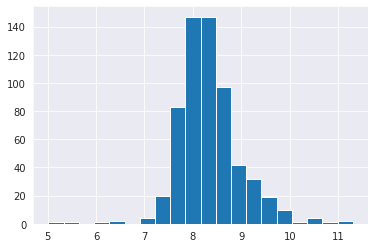

In [ ]:
'''
The extreme values are practically possible, 
i.e. some people might apply for high value loans due to specific needs. 
So instead of treating them as outliers, 
let’s try a log transformation to nullify their effect
'''
# Perform log transformation of LoanAmount, ApplicantIncome to make it closer to normal for treating outliers
train_df['LoanAmount'] = np.log1p(train_df['LoanAmount'])
train_df['ApplicantIncome'] = np.log1p(train_df['ApplicantIncome'])
# Looking at the distribtion of TotalIncome_log
train_df['ApplicantIncome'].hist(bins=20)

In [ ]:
# Perform log transformation of LoanAmount, ApplicantIncome 
#to make it closer to normal for treating outliers ON TEST
test_df['LoanAmount'] = np.log1p(test_df['LoanAmount'])
test_df['ApplicantIncome'] = np.log1p(test_df['ApplicantIncome'])

In [ ]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,x0_0,x0_1,x0_2
Loan_ID,,,,,,,,,,,,,,
LP001002,1,0,0,0,0,8.674197,0,4.993232,1,1,1,0,0,1
LP001003,1,1,1,0,0,8.430327,1,4.859812,1,1,0,1,0,0
LP001005,1,1,0,0,1,8.006701,0,4.204693,1,1,1,0,0,1
LP001006,1,1,0,1,0,7.857094,1,4.795791,1,1,1,0,0,1
LP001008,1,0,0,0,0,8.699681,0,4.955827,1,1,1,0,0,1


In [ ]:
X = train_df.drop(['Loan_Status'], axis=1)
y = train_df['Loan_Status']

# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_0,x0_1,x0_2
Loan_ID,,,,,,,,,,,,,
LP002555,1,1,1,0,1,8.430327,1,5.081404,1,1,0,1,0
LP002637,1,0,0,1,0,8.188411,1,4.615121,1,1,1,0,0
LP002347,1,1,0,0,0,8.085487,1,4.934474,1,1,0,1,0
LP002055,0,0,0,0,0,8.060540,1,4.890349,1,1,1,0,0
LP002008,1,1,1,0,1,8.656433,0,4.976734,0,1,1,0,0


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, log_loss

# XGBoost Classifier
xgb_classifier = XGBClassifier()
cv = KFold(n_splits=5, random_state=42, shuffle=True) 
rmse =np.sqrt(-cross_val_score(xgb_classifier, X_train, y_train, scoring="neg_mean_squared_log_error", cv=cv))
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print (rmse)
print(acc)

[0.34128208 0.35009219 0.3052033  0.28869342 0.28007376]
0.7723577235772358


In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import  RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
models = [Model('Random Forest', RandomForestClassifier()), 
          Model('Support Vector Machine', SVC()), 
          Model('K Nearest Neighbors', KNeighborsClassifier()),
          Model('XGB Classifier', XGBClassifier()),
          Model('GaussianNB', GaussianNB())]
models

[<(Random Forest, Not train yet)>,
 <(Support Vector Machine, Not train yet)>,
 <(K Nearest Neighbors, Not train yet)>,
 <(XGB Classifier, Not train yet)>,
 <(GaussianNB, Not train yet)>]

In [ ]:
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    models[i].accuracy_score(X_test, y_test)

In [ ]:
models

[<(Random Forest, 0.79%)>,
 <(Support Vector Machine, 0.80%)>,
 <(K Nearest Neighbors, 0.76%)>,
 <(XGB Classifier, 0.77%)>,
 <(GaussianNB, 0.80%)>]

In [ ]:
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), SVC())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(RobustScaler(), PCA(n_components=2), SVC())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
67.48%


Prediction accuracy for the standardized test dataset with PCA
67.48%



['scaledLR']: 0.808612 (0.049039)
['scaledLR', 'scaledKNN']: 0.771959 (0.040160)
['scaledLR', 'scaledKNN', 'scaledDT']: 0.731347 (0.063318)
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC']: 0.810653 (0.043482)
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC', 'scaledMNB']: 0.802531 (0.044266)
[array([0.78      , 0.81632653, 0.67346939, 0.85714286, 0.81632653,
       0.81632653, 0.83673469, 0.83673469, 0.83673469, 0.81632653]), array([0.74      , 0.7755102 , 0.67346939, 0.81632653, 0.79591837,
       0.7755102 , 0.81632653, 0.79591837, 0.7755102 , 0.75510204]), array([0.64      , 0.75510204, 0.6122449 , 0.81632653, 0.7755102 ,
       0.7755102 , 0.71428571, 0.79591837, 0.69387755, 0.73469388]), array([0.78      , 0.81632653, 0.69387755, 0.85714286, 0.81632653,
       0.83673469, 0.81632653, 0.83673469, 0.83673469, 0.81632653]), array([0.76      , 0.81632653, 0.69387755, 0.85714286, 0.79591837,
       0.79591837, 0.81632653, 0.83673469, 0.83673469, 0.81632653])]


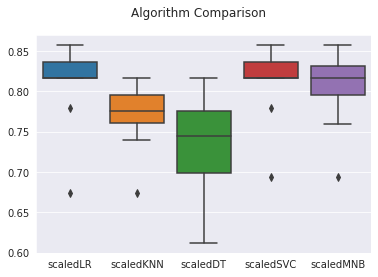

In [ ]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , StandardScaler()),('MNB' ,GaussianNB())]))))

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv=kfold , scoring='accuracy')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
print(results)
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(model_name)
plt.show()